In [16]:
#import Libraries & Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Define the path to the Excel file
file_path = r"C:\Users\rahul\Downloads\Screen\product.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married       State  Number_of_Referrals  \
0   11965-BIH  Female   38     Yes       Bihar                    4   
1   11987-PUN  Female   43      No      Punjab                   14   
2   11991-RAJ    Male   66     Yes   Rajasthan                   14   
3   12016-TAM  Female   57     Yes  Tamil Nadu                    0   
4   12052-PUN  Female   33      No      Punjab                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                21     Deal 3           Yes            Yes  ...   
1                 6        NaN           Yes             No  ...   
2                15     Deal 2           Yes            Yes  ...   
3                 9     Deal 5           Yes             No  ...   
4                31        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      -8.000000   3204.649902         35.82   
1  Bank Withdrawal      69.449997 

In [18]:
#Data processing 
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[789  55]
 [128 230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       844
           1       0.81      0.64      0.72       358

    accuracy                           0.85      1202
   macro avg       0.83      0.79      0.81      1202
weighted avg       0.84      0.85      0.84      1202



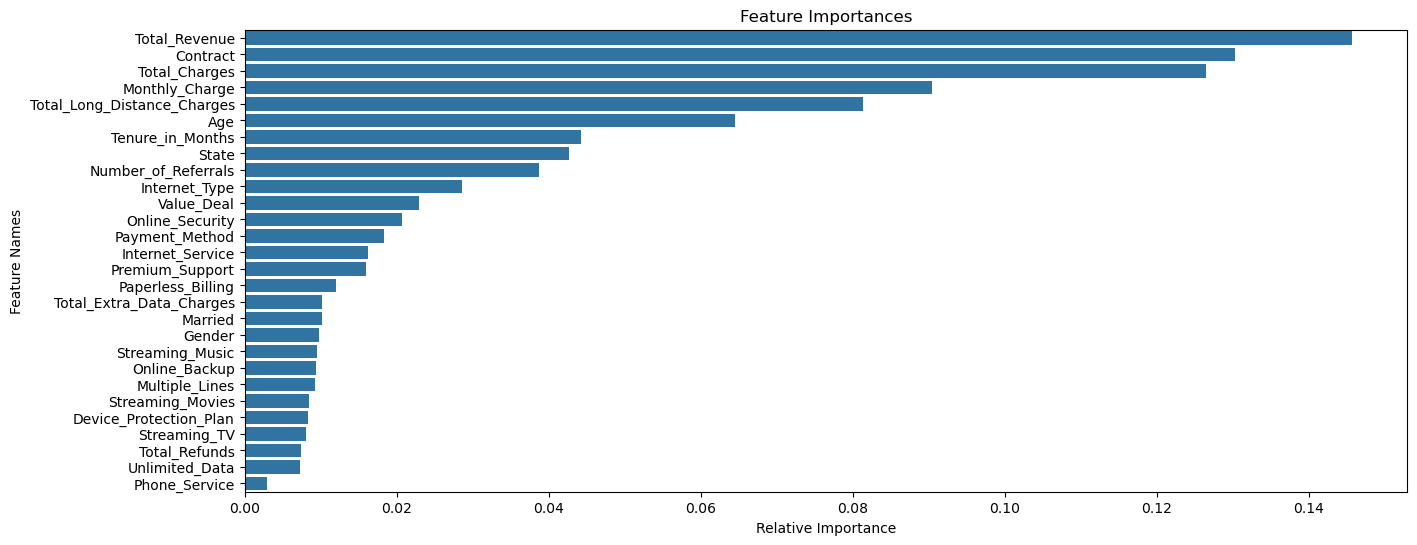

In [22]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [26]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\rahul\Downloads\Screen\product.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinedData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\Users\rahul\Downloads\Screen\prediction.csv", index=False)


  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   12056-WES    Male   27      No    West Bengal                    2   
1   12136-RAJ  Female   25     Yes      Rajasthan                    2   
2   12257-ASS  Female   39      No          Assam                    9   
3   16244-UTT  Female   19     Yes  Uttar Pradesh                    5   
4   16931-BIH  Female   39     Yes          Bihar                    8   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                20        NaN           Yes             No  ...   
1                35        NaN           Yes             No  ...   
2                 1        NaN           Yes             No  ...   
3                 7        NaN           Yes             No  ...   
4                23     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      90.400002    268.450012           0.0   
1  Bank Withdraw